In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [39]:
np.random.seed(0)

In [40]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1, factor = 0.2)


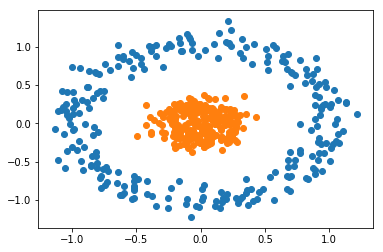

In [41]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [42]:
model = Sequential()
model.add(Dense(4, input_shape = (2,), activation = 'sigmoid'))
model.add(Dense(1, activation ='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics =['accuracy'])


In [43]:
h = model.fit(x=X,y=y, verbose = 1, batch_size = 20, epochs = 100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 0.6959 - acc: 0.5100
Epoch 2/100
500/500 [==============================] - 0s 174us/step - loss: 0.6937 - acc: 0.6200
Epoch 3/100
500/500 [==============================] - 0s 178us/step - loss: 0.6925 - acc: 0.5140
Epoch 4/100
500/500 [==============================] - 0s 178us/step - loss: 0.6916 - acc: 0.6780
Epoch 5/100
500/500 [==============================] - 0s 174us/step - loss: 0.6905 - acc: 0.6320
Epoch 6/100
500/500 [==============================] - 0s 178us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 172us/step - loss: 0.6865 - acc: 0.6460
Epoch 8/100
500/500 [==============================] - 0s 167us/step - loss: 0.6838 - acc: 0.6740
Epoch 9/100
500/500 [==============================] - 0s 174us/step - loss: 0.6796 - acc: 0.7580
Epoch 10/100
500/500 [==============================] - 0s 176us/step - loss: 0.6734 - acc: 0.7980
Epoch 11/100
500/500 

Text(0.5, 1.0, 'accuracy')

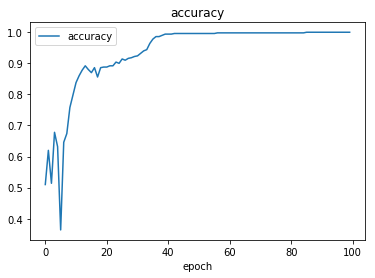

In [44]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

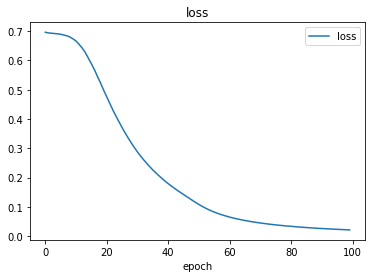

In [45]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [50]:
def plot_d(X,y,model):
    x_span = np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25, 50)
    y_span = np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25, 50)
    xx, yy = np.meshgrid(x_span,y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

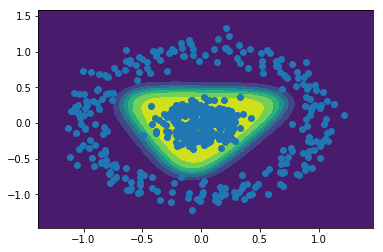

In [53]:
plot_d(X,y,model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])


Prediction is :  [[0.9903064]]


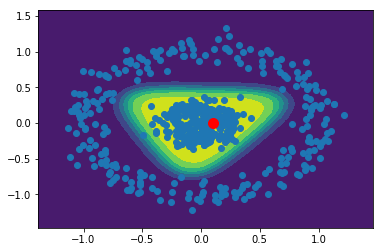

In [55]:
plot_d(X,y,model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])
x = 0.1
y = 0
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker = "o", markersize = 10 , color = 'red')
print("Prediction is : ",prediction)